# XGBoost - Extreme Gradient Boosting

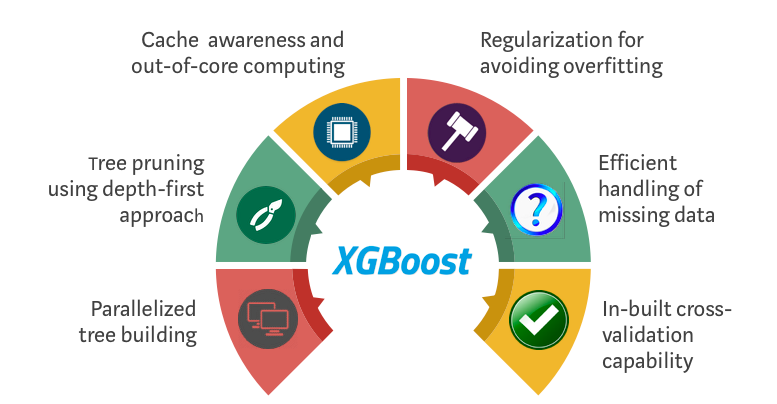

In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [3]:
import pandas as pd
df = pd.read_csv("booking_train.csv")
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


### Target - Booking_status
1. 0 - Not cancelled
2. 1 - Cancelled

### Step 2 - Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [5]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Seperate X and Y(booking_status)

In [7]:
X = df.drop(columns=["id", "booking_status"])
Y = df[["booking_status"]]

In [8]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [9]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


In [10]:
Y.value_counts()

booking_status
0                 25596
1                 16504
Name: count, dtype: int64

<Axes: xlabel='booking_status'>

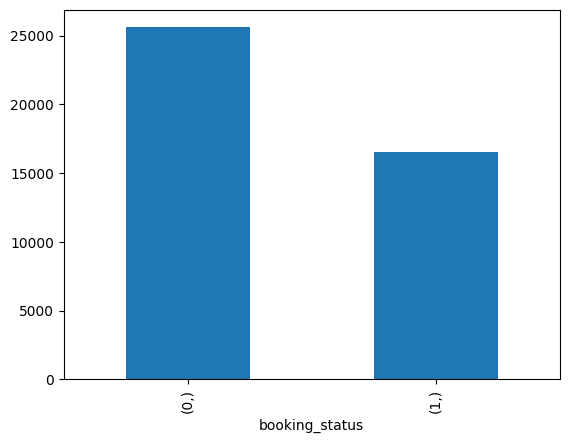

In [11]:
Y.value_counts().plot(kind="bar")

### Step 4 - Apply preprocessing on X

In [12]:
X.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


### Step 5 - Apply Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, train_size=0.2, random_state=21)

In [17]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
30591,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.825082,0.409661,-0.563215,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.653398,0.552579
3516,-1.753925,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,-1.281486,-2.441040,1.557404,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-1.065367,-0.737691
39119,0.151040,-0.313454,0.130259,-0.979466,2.996268,-0.160945,-0.515173,-0.652388,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,0.200158,-0.737691
32584,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,1.012873,0.409661,-1.270088,0.685950,-1.149928,-0.173408,-0.060506,-0.101479,-0.661476,-0.737691
8944,0.151040,-0.313454,1.259332,1.823003,-0.407020,-0.160945,0.685890,0.371439,0.409661,0.143658,0.685950,0.428551,-0.173408,-0.060506,-0.101479,0.191811,-0.737691


In [18]:
ytrain.head()

,booking_status
30591,0
3516,0
39119,0
32584,0
8944,1


In [19]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
20351,0.151040,-0.313454,1.259332,-0.278849,-0.40702,-0.160945,-0.515173,-0.763405,-2.441040,1.203968,0.460940,-1.149928,-0.173408,-0.060506,-0.101479,-1.119219,-0.737691
21728,-1.753925,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,1.086885,0.409661,-0.563215,0.910961,-1.149928,-0.173408,-0.060506,-0.101479,0.684828,-0.737691
12697,0.151040,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,-0.775741,0.409661,0.850531,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.492610,0.552579
20136,2.056005,-0.313454,-0.998814,-0.979466,-0.40702,-0.160945,0.685890,-0.973105,0.409661,-0.209778,0.460940,0.428551,-0.173408,-0.060506,-0.101479,1.627240,1.842849
27760,-1.753925,-0.313454,-0.998814,-0.979466,-0.40702,-0.160945,-0.515173,-1.207475,0.409661,1.557404,-1.451649,-1.149928,-0.173408,-0.060506,-0.101479,-1.334628,-0.737691


In [20]:
ytest.head()

,booking_status
20351,0
21728,0
12697,1
20136,0
27760,0


In [21]:
xtrain.shape

(8420, 17)

In [22]:
xtest.shape

(33680, 17)

### Step 6 - Model Building
XGBoost - Hyperparameter  tuning is not required

In [23]:
from pyexpat import model
import xgboost as xgb
model = xgb.XGBClassifier(max_depth = 3, n_estimators = 200)
model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Step 7 - Model Evaluation

In [24]:
model.score(xtrain, ytrain)

0.8541567695961996

In [25]:
model.score(xtest, ytest)

0.8135985748218527

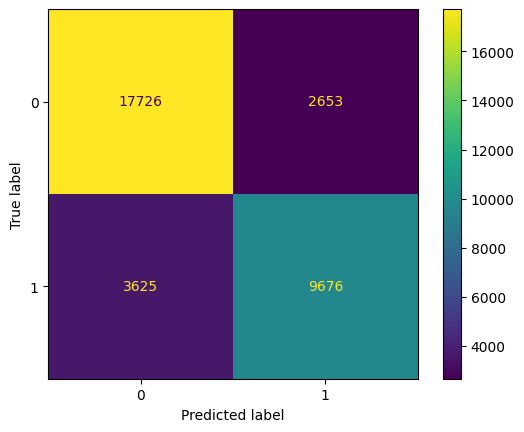

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)

In [28]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

array([0, 1, 0, 0, 0])

In [29]:
ytest.head()

,booking_status
20351,0
21728,0
12697,1
20136,0
27760,0


In [30]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     20379
           1       0.78      0.73      0.76     13301

    accuracy                           0.81     33680
   macro avg       0.81      0.80      0.80     33680
weighted avg       0.81      0.81      0.81     33680



In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro")
scores

array([0.8169207 , 0.79702648, 0.78840165, 0.79843126, 0.79878535])

In [32]:
scores.mean()

np.float64(0.7999130901920861)

### ROC_AUC (Receiver Operator Characteristics - Area Under Curve)

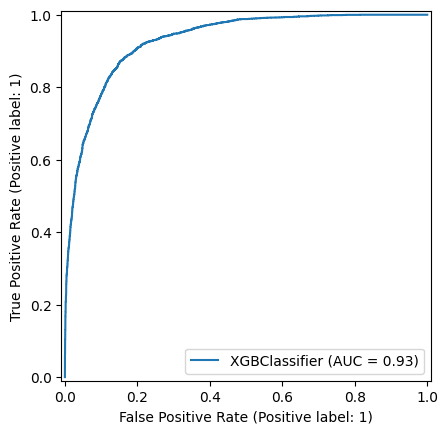

In [33]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, xtrain, ytrain)

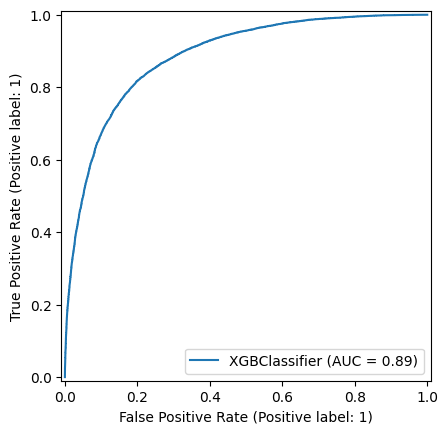

In [34]:
RocCurveDisplay.from_estimator(model, xtest, ytest)

In [35]:
roc_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="roc_auc")
roc_scores

array([0.8987488 , 0.88614778, 0.87094634, 0.87945414, 0.88506842])

In [36]:
roc_scores.mean()

np.float64(0.8840730980692643)

### Feature Importance

In [37]:
model.feature_importances_

array([0.02938897, 0.01742207, 0.01967349, 0.02146411, 0.0207811 ,
       0.08000895, 0.02656048, 0.10048392, 0.05472517, 0.04028461,
       0.01982426, 0.22854473, 0.06678485, 0.        , 0.        ,
       0.05258751, 0.22146574], dtype=float32)

In [39]:
imp = pd.Series(model.feature_importances_, index=xtrain.columns)

In [40]:
imp.sort_values(ascending=False)

market_segment_type                     0.228545
no_of_special_requests                  0.221466
lead_time                               0.100484
required_car_parking_space              0.080009
repeated_guest                          0.066785
arrival_year                            0.054725
avg_price_per_room                      0.052588
arrival_month                           0.040285
no_of_adults                            0.029389
room_type_reserved                      0.026560
no_of_week_nights                       0.021464
type_of_meal_plan                       0.020781
arrival_date                            0.019824
no_of_weekend_nights                    0.019673
no_of_children                          0.017422
no_of_previous_bookings_not_canceled    0.000000
no_of_previous_cancellations            0.000000
dtype: float32

<Axes: >

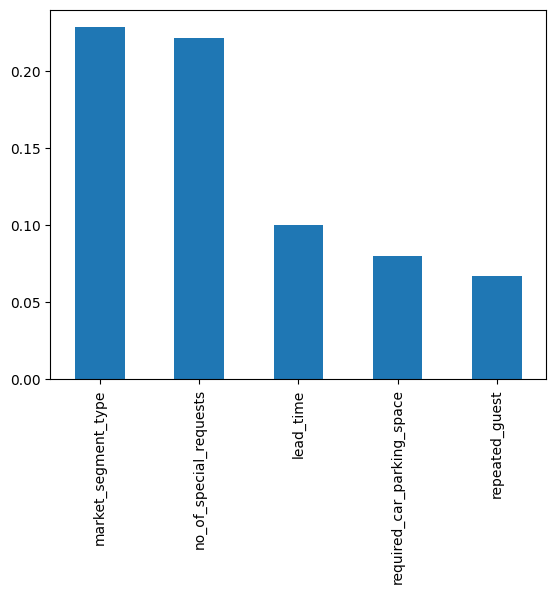

In [41]:
imp.sort_values(ascending=False)[0:5].plot(kind="bar")

### Step 8 - Out of sample prediction

In [43]:
xnew = pd.read_csv("booking_test.csv")
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [44]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [45]:
xnew2 = xnew.copy()
xnew2 = xnew2.drop(columns=["id"])

In [46]:
xnew2

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,2,0,1,2,0,0,0,315,2018,9,30,1,0,0,0,160.00,0
28064,2,0,2,2,0,0,0,81,2018,3,25,0,0,0,0,65.00,1
28065,2,0,1,2,0,0,0,40,2018,10,22,0,0,0,0,85.00,0
28066,3,0,0,4,0,0,1,4,2018,9,6,1,0,0,0,162.75,0


In [47]:
xnew2_pre = num_pipe.transform(xnew2)
xnew2_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [49]:
preds = model.predict(xnew2_pre)
preds[0:5]

array([0, 0, 1, 0, 0])

In [51]:
probs = model.predict_proba(xnew2_pre)[:, 1]
probs[0:5]

array([0.11685248, 0.15781127, 0.59469235, 0.06639288, 0.37653774],
      dtype=float32)

In [52]:
res = xnew[["id"]]
res

,id
0,42100
1,42101
2,42102
3,42103
4,42104
...,...
28063,70163
28064,70164
28065,70165
28066,70166


In [54]:
res["status_pred"] = preds
res["prob"] = probs

In [55]:
res = res.round(4)
res

,id,status_pred,prob
0,42100,0,0.1169
1,42101,0,0.1578
2,42102,1,0.5947
3,42103,0,0.0664
4,42104,0,0.3765
...,...,...,...
28063,70163,1,0.8788
28064,70164,0,0.0305
28065,70165,0,0.0879
28066,70166,0,0.4673


<Axes: xlabel='status_pred'>

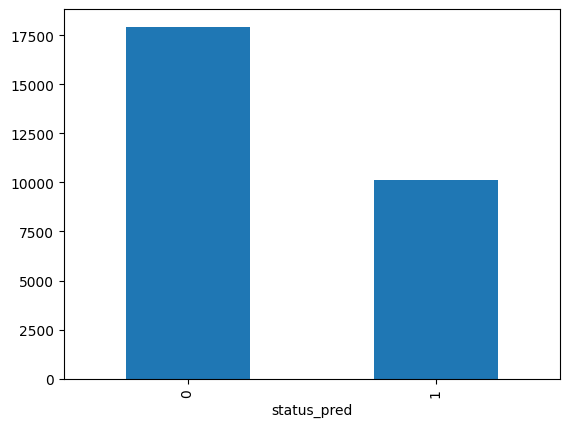

In [59]:
res["status_pred"].value_counts().plot(kind="bar")

In [60]:
res.to_csv("XGBResult.csv", index=False)

### Save the preprocessor and model object

In [61]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [62]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
import joblib

In [65]:

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [66]:
joblib.dump(model, "booking_xgb.joblib")

['booking_xgb.joblib']

### Load the pre and model

In [67]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [68]:
m = joblib.load("booking_xgb.joblib")
m

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)